In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1gi9OjBOFXrLkmDxYNxst-ki4gvcIsLs_' #-- Updated File ID for my zip
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('ALF_Data.csv')

    100% |████████████████████████████████| 993kB 17.0MB/s 


In [2]:
!pip install scikit-plot

In [2]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scikitplot as skplt
from keras.layers.convolutional import Convolution2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [4]:
df = pd.read_csv("ALF_Data.csv")

In [5]:
df.isnull().sum()

Age                          0
Gender                       0
Region                       0
Weight                     194
Height                     191
Body Mass Index            290
Obesity                    290
Waist                      314
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  452
Income                    1161
Source of Care               0
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Family  HyperTension         0
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
Family Hepatitis             6
Chronic Fatigue             35
ALF                       2785
dtype: int64

In [0]:
'''df["Weight"].fillna(df["Weight"].mean(), inplace=True)
df["Height"].fillna(df["Height"].mean(), inplace=True)
df["Body Mass Index"].fillna(df["Body Mass Index"].mean(), inplace=True)
df["Obesity"].fillna(df["Obesity"].mean(), inplace=True)
df["Waist"].fillna(df["Waist"].mean(), inplace=True)
df["Maximum Blood Pressure"].fillna(df["Maximum Blood Pressure"].mean(), inplace=True)
df["Minimum Blood Pressure"].fillna(df["Minimum Blood Pressure"].mean(), inplace=True)
df["Good Cholesterol"].fillna(df["Good Cholesterol"].mean(), inplace=True)
df["Bad Cholesterol"].fillna(df["Bad Cholesterol"].mean(), inplace=True)
df["Total Cholesterol"].fillna(df["Total Cholesterol"].mean(), inplace=True)
df["Physical Activity"].fillna(df["Physical Activity"].mean(), inplace=True)
df["Education"].fillna(df["Education"].mean(), inplace=True)
df["Unmarried"].fillna(df["Unmarried"].mean(), inplace=True)
df["Income"].fillna(df["Income"].mean(), inplace=True)
df["PoorVision"].fillna(df["PoorVision"].mean(), inplace=True)
df["HyperTension"].fillna(df["HyperTension"].mean(), inplace=True)
df["Diabetes"].fillna(df["Diabetes"].mean(), inplace=True)
df["Hepatitis"].fillna(df["Hepatitis"].mean(), inplace=True)
df["Family Hepatitis"].fillna(df["Family Hepatitis"].mean(), inplace=True)
df["Chronic Fatigue"].fillna(df["Chronic Fatigue"].mean(), inplace=True)
df["ALF"].fillna(df["ALF"].mean(), inplace=True)
'''
#df["ALF"].fillna(value = 1, inplace=True)

In [0]:
df = df[pd.notnull(df['ALF'])]

In [0]:
#df = df.drop(df.columns[['Income','Unmarried','Education','Poor Vision']], axis=1, inplace=True)
#df = df.drop(['Income','Unmarried','Education','PoorVision'], axis=1, inplace=True)
#df = df.drop(df.ix[:,'Income':'Unmarried':'Education':'PoorVision'].head(0).columns, axis=1)
df = df.drop(['Income','Unmarried','Education','PoorVision'],axis=1)

In [0]:
df = df.dropna(how='any')
#df = df.dropna(how='all')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5435 entries, 0 to 5999
Data columns (total 26 columns):
Age                       5435 non-null int64
Gender                    5435 non-null object
Region                    5435 non-null object
Weight                    5435 non-null float64
Height                    5435 non-null float64
Body Mass Index           5435 non-null float64
Obesity                   5435 non-null float64
Waist                     5435 non-null float64
Maximum Blood Pressure    5435 non-null float64
Minimum Blood Pressure    5435 non-null float64
Good Cholesterol          5435 non-null float64
Bad Cholesterol           5435 non-null float64
Total Cholesterol         5435 non-null float64
Dyslipidemia              5435 non-null int64
PVD                       5435 non-null int64
Physical Activity         5435 non-null float64
Source of Care            5435 non-null object
Alcohol Consumption       5435 non-null int64
HyperTension              5435 non-null 

In [10]:
i = 0
while i!=2000:
    try:
        ind= df.sample().index
        ind1 = ind[0]
        #ind1
        df1 = df.iloc[[ind1]]
        val = df1['ALF'] < 1.0
        if val.bool():
            df = df.drop(df.index[ind1])
            i = i+1
    except IndexError:
        continue
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3435 entries, 0 to 5999
Data columns (total 26 columns):
Age                       3435 non-null int64
Gender                    3435 non-null object
Region                    3435 non-null object
Weight                    3435 non-null float64
Height                    3435 non-null float64
Body Mass Index           3435 non-null float64
Obesity                   3435 non-null float64
Waist                     3435 non-null float64
Maximum Blood Pressure    3435 non-null float64
Minimum Blood Pressure    3435 non-null float64
Good Cholesterol          3435 non-null float64
Bad Cholesterol           3435 non-null float64
Total Cholesterol         3435 non-null float64
Dyslipidemia              3435 non-null int64
PVD                       3435 non-null int64
Physical Activity         3435 non-null float64
Source of Care            3435 non-null object
Alcohol Consumption       3435 non-null int64
HyperTension              3435 non-null 

In [11]:
df
#df.info()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,Source of Care,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.00,162.1,21.31,0.0,83.6,135.0,71.0,...,Governament Hospital,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.20,162.2,22.88,0.0,76.6,96.0,52.0,...,Never Counsulted,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.90,162.5,31.77,1.0,113.2,115.0,57.0,...,Never Counsulted,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.40,160.5,26.94,0.0,77.9,110.0,57.0,...,Private Hospital,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.10,159.2,28.84,0.0,89.3,132.0,73.0,...,clinic,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,26,F,east,119.30,193.2,31.96,1.0,117.9,129.0,70.0,...,Private Hospital,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,66,F,north,85.10,172.1,28.73,0.0,99.2,137.0,92.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
8,53,M,east,75.20,174.1,24.81,0.0,85.6,110.0,74.0,...,Private Hospital,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
11,47,M,south,49.00,155.3,20.32,0.0,78.6,146.0,87.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
12,62,F,south,56.10,165.5,20.48,0.0,78.7,201.0,119.0,...,Private Hospital,1,1.0,0,0.0,0,0.0,0.0,0.0,0.0


PVD  ALF
0    0.0    5379
     1.0     395
1    0.0     157
     1.0      69
dtype: int64

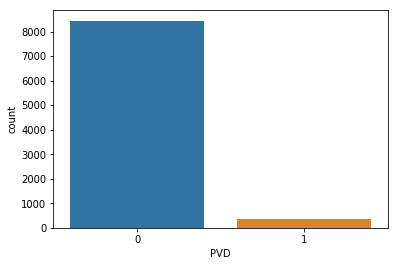

In [10]:
#df['Physical Activity','PVD','Education','Unmarried']
sns.countplot(data=df, x = 'PVD',label='Count')
#df.plot(kind='scatter', x='Education', y='ALF', color='r')
df.groupby(['PVD','ALF']).size()

In [14]:
df.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Physical Activity,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,...,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000
mean,49.929840,78.833642,167.330917,28.081397,0.305095,96.749898,126.325473,71.962445,51.737118,153.848326,...,2.045997,0.310044,0.410771,0.226201,0.114702,0.317322,0.065793,0.018923,0.029112,0.108297
std,18.686904,18.865662,10.218139,5.935442,0.460515,14.878516,21.262963,12.334332,15.771608,42.573182,...,0.818171,0.462579,0.492045,0.418432,0.318708,0.465502,0.247957,0.136272,0.168145,0.310800
min,20.000000,34.500000,130.400000,15.180000,0.000000,59.400000,72.000000,10.000000,19.000000,42.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,65.600000,160.000000,24.085000,0.000000,86.200000,112.000000,65.000000,41.000000,124.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,76.600000,166.900000,27.170000,0.000000,96.100000,122.000000,72.000000,49.000000,150.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,89.100000,174.500000,31.055000,1.000000,106.000000,137.000000,80.000000,60.000000,179.000000,...,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,63.910000,1.000000,173.400000,226.000000,122.000000,160.000000,560.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df[]

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
5,26,F,east,119.3,193.2,31.96,1.0,117.9,129.0,70.0,...,0.0,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,66,F,north,85.1,172.1,28.73,0.0,99.2,137.0,92.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [0]:
df.to_csv('Liver_alfOnly.csv')

In [16]:
df = pd.read_csv("Liver_alfOnly.csv")
df

,Unnamed: 0,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,Source of Care,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,0,65,M,east,56.00,162.1,21.31,0.0,83.6,135.0,...,Governament Hospital,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,1,36,M,south,60.20,162.2,22.88,0.0,76.6,96.0,...,Never Counsulted,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,2,66,M,east,83.90,162.5,31.77,1.0,113.2,115.0,...,Never Counsulted,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,3,54,M,east,69.40,160.5,26.94,0.0,77.9,110.0,...,Private Hospital,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,4,63,M,north,73.10,159.2,28.84,0.0,89.3,132.0,...,clinic,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,5,26,F,east,119.30,193.2,31.96,1.0,117.9,129.0,...,Private Hospital,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,6,66,F,north,85.10,172.1,28.73,0.0,99.2,137.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,8,53,M,east,75.20,174.1,24.81,0.0,85.6,110.0,...,Private Hospital,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
8,11,47,M,south,49.00,155.3,20.32,0.0,78.6,146.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
9,12,62,F,south,56.10,165.5,20.48,0.0,78.7,201.0,...,Private Hospital,1,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 27 columns):
Unnamed: 0                3435 non-null int64
Age                       3435 non-null int64
Gender                    3435 non-null object
Region                    3435 non-null object
Weight                    3435 non-null float64
Height                    3435 non-null float64
Body Mass Index           3435 non-null float64
Obesity                   3435 non-null float64
Waist                     3435 non-null float64
Maximum Blood Pressure    3435 non-null float64
Minimum Blood Pressure    3435 non-null float64
Good Cholesterol          3435 non-null float64
Bad Cholesterol           3435 non-null float64
Total Cholesterol         3435 non-null float64
Dyslipidemia              3435 non-null int64
PVD                       3435 non-null int64
Physical Activity         3435 non-null float64
Source of Care            3435 non-null object
Alcohol Consumption       3435 non-null 

Source of Care        ALF
                      0.0       1
Governament Hospital  0.0     164
                      1.0      17
Never Counsulted      0.0     491
                      1.0      13
Private Hospital      0.0    1764
                      1.0     260
clinic                0.0     643
                      1.0      82
dtype: int64

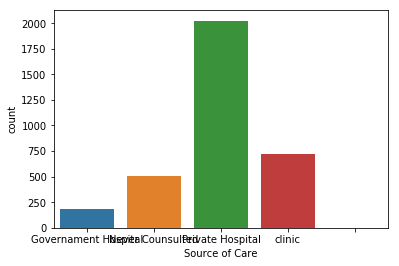

In [18]:
#df['Physical Activity','PVD','Education','Unmarried', 'Source of Care','Family  HyperTension','Family Hepatitis','Chronic Fatigue','PVD','Region',]
f = 'Source of Care'
sns.countplot(data=df, x = f, label='Count')
#df.plot(kind='scatter', x=f, y='ALF', color='r')
df.groupby([f, 'ALF']).size()

In [0]:
df = df.drop(['Unnamed: 0','Physical Activity','PVD', 'Source of Care','Family  HyperTension','Family Hepatitis','Chronic Fatigue','PVD','Region','Diabetes','Family Diabetes','Family Hepatitis','Hepatitis'],axis=1)
#df = df.drop(['Source of Care','Unnamed: 0'], axis =1)

In [20]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})  
df['Gender']

0       1
1       1
2       1
3       1
4       1
5       0
6       0
7       1
8       1
9       0
10      0
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      0
19      0
20      0
21      1
22      1
23      0
24      0
25      0
26      1
27      0
28      1
29      0
       ..
3405    0
3406    1
3407    0
3408    0
3409    0
3410    1
3411    0
3412    1
3413    0
3414    0
3415    0
3416    1
3417    1
3418    1
3419    0
3420    1
3421    0
3422    1
3423    0
3424    1
3425    1
3426    1
3427    1
3428    0
3429    0
3430    0
3431    0
3432    0
3433    0
3434    1
Name: Gender, Length: 3435, dtype: int64

In [0]:
#df['Region'] = df['Region'].map({'north': 0, 'east': 1, 'south':2, 'west':3})  
#df['Region']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 16 columns):
Age                       3435 non-null int64
Gender                    3435 non-null int64
Weight                    3435 non-null float64
Height                    3435 non-null float64
Body Mass Index           3435 non-null float64
Obesity                   3435 non-null float64
Waist                     3435 non-null float64
Maximum Blood Pressure    3435 non-null float64
Minimum Blood Pressure    3435 non-null float64
Good Cholesterol          3435 non-null float64
Bad Cholesterol           3435 non-null float64
Total Cholesterol         3435 non-null float64
Dyslipidemia              3435 non-null int64
Alcohol Consumption       3435 non-null int64
HyperTension              3435 non-null float64
ALF                       3435 non-null float64
dtypes: float64(12), int64(4)
memory usage: 429.5 KB


In [22]:
list(df)

['Age',
 'Gender',
 'Weight',
 'Height',
 'Body Mass Index',
 'Obesity',
 'Waist',
 'Maximum Blood Pressure',
 'Minimum Blood Pressure',
 'Good Cholesterol',
 'Bad Cholesterol',
 'Total Cholesterol',
 'Dyslipidemia',
 'Alcohol Consumption',
 'HyperTension',
 'ALF']

In [0]:
X = df.drop(['ALF'],axis=1)
y = df.drop(['Age','Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'Alcohol Consumption', 'HyperTension'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train.to_csv('ALFXtrain.csv')
y_train.to_csv('ALFytrain.csv')
X_test.to_csv('ALFXtest.csv')
y_test.to_csv('ALFytest.csv')

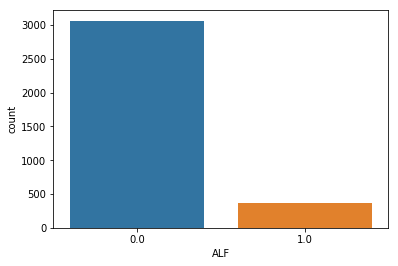

In [25]:
sns.countplot(data=df, x = 'ALF', label='Count')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


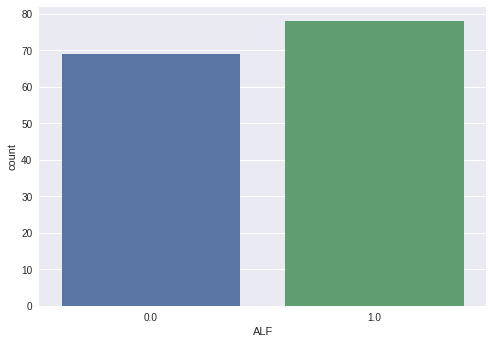

In [0]:
sns.countplot(data=y_test, x = 'ALF', label='Count')


In [26]:
df.groupby(['ALF']).size()


ALF
0.0    3063
1.0     372
dtype: int64

In [27]:
y_test.groupby(['ALF']).size()

ALF
0.0    614
1.0     73
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(32,16,8,1))
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 16, 8, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions = mlp.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))

[[575  39]
 [ 42  31]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       614
         1.0       0.44      0.42      0.43        73

   micro avg       0.88      0.88      0.88       687
   macro avg       0.69      0.68      0.68       687
weighted avg       0.88      0.88      0.88       687



In [35]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# compile ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the data
hisroy =classifier.fit(X_train, y_train, batch_size = 20, epochs = 500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
2748/2748 [==============================] - 1s 286us/step - loss: 0.5085 - acc: 0.8905
Epoch 2/500
2748/2748 [==============================] - 0s 56us/step - loss: 0.2819 - acc: 0.8912
Epoch 3/500
2748/2748 [==============================] - 0s 59us/step - loss: 0.2665 - acc: 0.8912
Epoch 4/500
2748/2748 [==============================] - 0s 56us/step - loss: 0.2570 - acc: 0.8912
Epoch 5/500
2748/2748 [==============================] - 0s 61us/step - loss: 0.2505 - acc: 0.8912
Epoch 6/500
2748/2748 [==============================] - 0s 59us/step - loss: 0.2457 - acc: 0.8912
Epoch 7/500
2748/2748 [==============================] - 0s 57us/step - loss: 0.2421 - acc: 0.8912
Epoch 8/500
2748/2748 [==============================] - 0s 55us/step - loss: 0.2396 - acc: 0.8912
Epoch 9/500
2748/2748 [==============================] - 0s 58us/step - loss: 0.2375 - 

In [0]:
data = [[25, 1,65, 150, 22.7, 0, 70.6, 110, 80, 50, 120, 170, 0,0, 0]]
td = pd.DataFrame(data, columns = ['Age','Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'Alcohol Consumption', 'HyperTension'])
td = sc.transform(td)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
y_pred = classifier.predict(td)
y_pred = [ 1 if y>0.5 else 0 for y in y_pred ]
#print(classification_report(y_test, y_pred))
y_pred

[0]

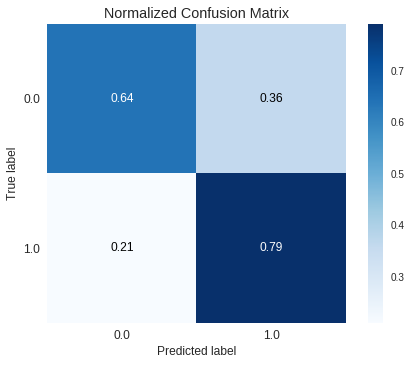

In [0]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [62]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>0.2 else 0 for y in y_pred ]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       614
         1.0       0.33      0.63      0.43        73

   micro avg       0.83      0.83      0.83       687
   macro avg       0.64      0.74      0.67       687
weighted avg       0.88      0.83      0.85       687



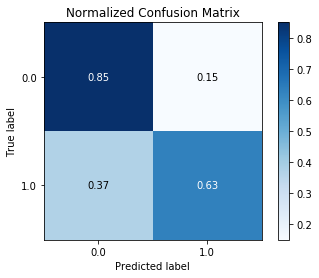

In [63]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [0]:
test1 = pd.read_csv('Liver_b.csv')
test1 = test1.drop(['Unnamed: 0','Physical Activity','PVD', 'Source of Care','Family  HyperTension','Family Hepatitis','Chronic Fatigue','PVD','Region', 'Diabetes', 'Family Diabetes', 'Hepatitis'],axis=1)
test1['Gender'] = test1['Gender'].map({'F': 0, 'M': 1})  
xtest = test1.drop(['ALF'],axis=1)
xtest = sc.transform(xtest)
ytest = test1.drop(['Age','Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'Alcohol Consumption', 'HyperTension'],axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [0]:
y_pred = classifier.predict(xtest)
y_pred = [ 1 if y>0.5 else 0 for y in y_pred ]
#y_pred

In [0]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64      3018
         1.0       0.60      0.42      0.49      2889

   micro avg       0.58      0.58      0.58      5907
   macro avg       0.58      0.58      0.57      5907
weighted avg       0.58      0.58      0.57      5907



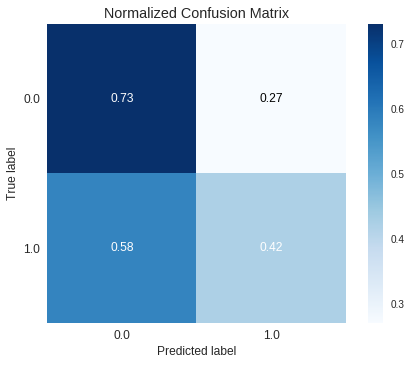

In [0]:
skplt.metrics.plot_confusion_matrix(ytest, y_pred, normalize=True)

In [0]:
X[0:11]

,Age,Gender,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,Alcohol Consumption,HyperTension
0,36,1,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0.0
1,53,1,94.9,178.0,29.95,0.0,104.8,112.0,68.0,68.0,109.0,177.0,0,0,0.0
2,46,0,88.6,172.9,29.64,0.0,100.9,122.0,79.0,35.0,136.0,171.0,0,1,0.0
3,38,0,80.5,171.0,27.53,0.0,90.0,107.0,75.0,36.0,203.0,239.0,0,0,0.0
4,71,1,78.1,152.2,33.71,1.0,111.8,116.0,44.0,63.0,202.0,265.0,0,0,1.0
5,54,1,59.6,145.5,28.15,0.0,90.6,170.0,110.0,40.0,253.0,293.0,1,0,1.0
6,85,1,71.2,167.6,25.35,0.0,103.1,212.0,94.0,61.0,175.0,236.0,0,0,1.0
7,65,0,75.2,165.3,27.52,0.0,102.6,131.0,80.0,54.0,161.0,215.0,0,1,0.0
8,81,0,91.9,180.9,28.08,0.0,114.9,153.0,63.0,40.0,160.0,200.0,0,0,1.0
9,70,1,85.5,168.6,30.08,1.0,97.0,126.0,78.0,45.0,164.0,209.0,0,0,0.0


In [0]:
classifier.save_weights("liverALF_wts.h5")

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 15 columns):
Age                       735 non-null int64
Gender                    735 non-null int64
Weight                    735 non-null float64
Height                    735 non-null float64
Body Mass Index           735 non-null float64
Obesity                   735 non-null float64
Waist                     735 non-null float64
Maximum Blood Pressure    735 non-null float64
Minimum Blood Pressure    735 non-null float64
Good Cholesterol          735 non-null float64
Bad Cholesterol           735 non-null float64
Total Cholesterol         735 non-null float64
Dyslipidemia              735 non-null int64
Alcohol Consumption       735 non-null int64
HyperTension              735 non-null float64
dtypes: float64(11), int64(4)
memory usage: 86.2 KB


              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      2449
         1.0       0.44      0.84      0.58       299

   micro avg       0.87      0.87      0.87      2748
   macro avg       0.71      0.86      0.75      2748
weighted avg       0.92      0.87      0.88      2748



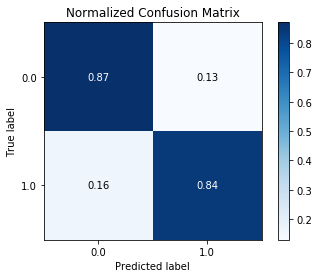

In [65]:
y_pred = classifier.predict(X_train)
y_pred = [ 1 if y>0.2 else 0 for y in y_pred ]
print(classification_report(y_train, y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)